DSCI 552: Homework #1

Michael Hanono

ID: 1426377592

09/17/2021

In [23]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install -U scikit-learn

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

(a) Download and load the Vertebral Column Data Set

In [27]:
# Read data from file and change the labels to 0 and 1
df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", sep=" ", names=["pelvicIncidence", "pelvicTilt", "lumbarLordosisAngle", "sacralSlope", "pelvicRadius", "gradeOfSpondylolisthesis", "classLabel"])
data = df
data.loc[data.classLabel == "AB", "classLabel"] = 1
data.loc[data.classLabel == "NO", "classLabel"] = 0
data = data.reset_index()
data = data.drop(columns=['index'])


print("Sample data:")
data.head()

Sample data:


,pelvicIncidence,pelvicTilt,lumbarLordosisAngle,sacralSlope,pelvicRadius,gradeOfSpondylolisthesis,classLabel
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


(b) Pre-Processing and Exploratory data analysis:

    i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

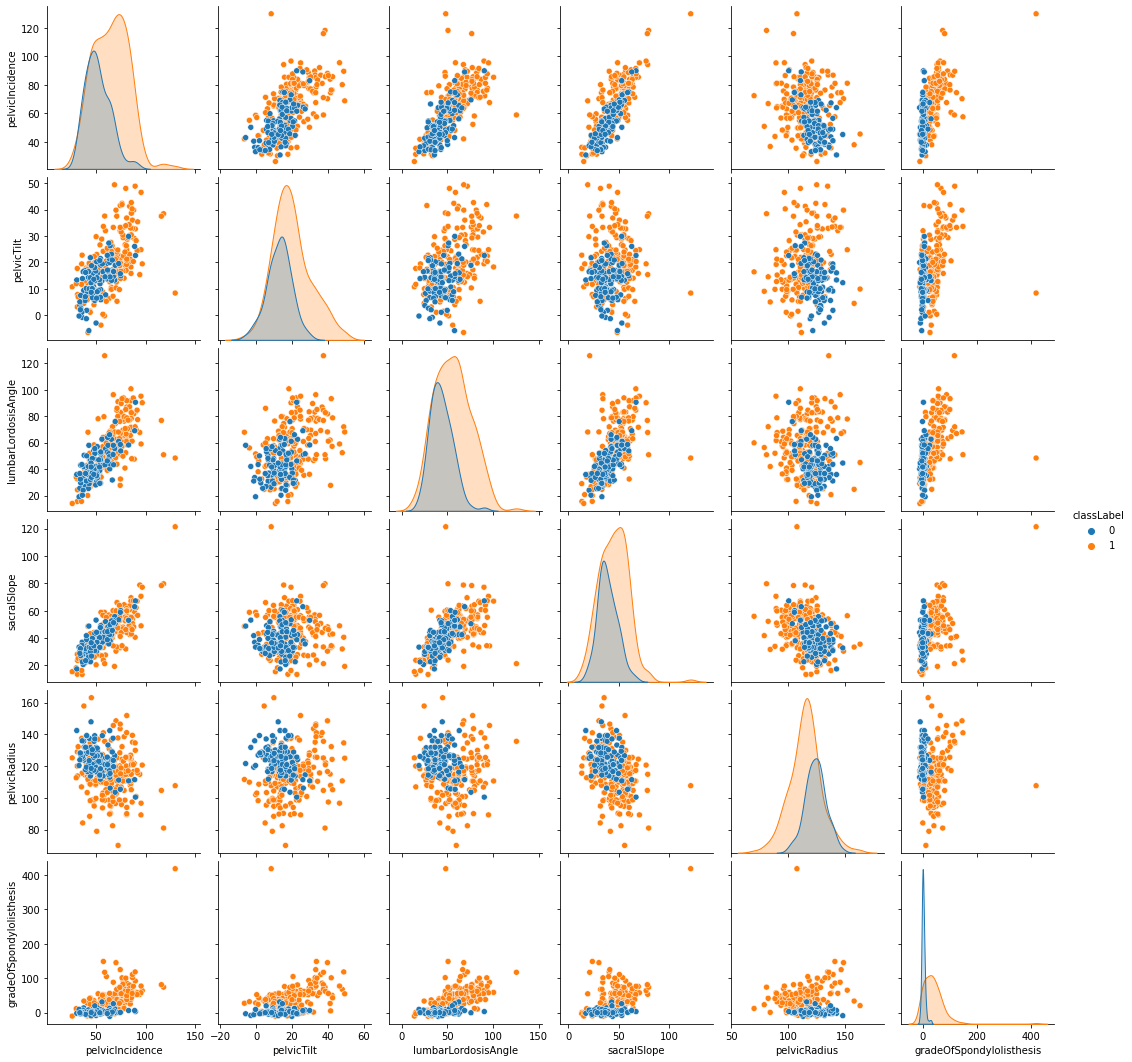

In [28]:
# Create scatterplots of the independent variables 
sns.pairplot(data, hue="classLabel")

    ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).


Text(0.5, 0, 'Class Label')

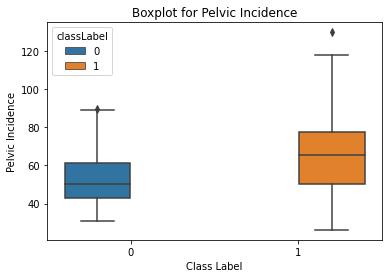

In [29]:
# Create boxplot for Pelvic Incidence
ax = sns.boxplot(x="classLabel", y="pelvicIncidence", hue="classLabel", data=data)
ax.set_title('Boxplot for Pelvic Incidence')
ax.set_ylabel('Pelvic Incidence')
ax.set_xlabel('Class Label')

Text(0.5, 0, 'Class Label')

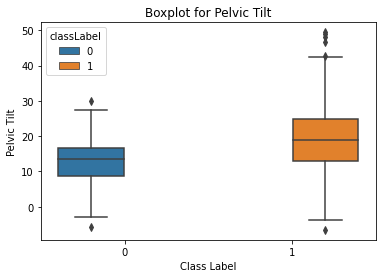

In [30]:
# Create boxplot for Pelvic Tilt
ax = sns.boxplot(x="classLabel", y="pelvicTilt", hue="classLabel", data=data)
ax.set_title('Boxplot for Pelvic Tilt')
ax.set_ylabel('Pelvic Tilt')
ax.set_xlabel('Class Label')

Text(0.5, 0, 'Class Label')

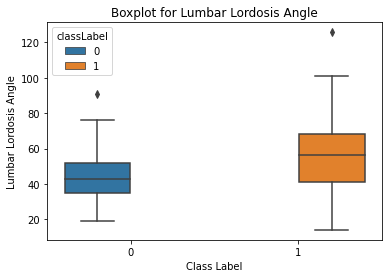

In [31]:
# Create boxplot for Lumbar Lordosis Angle
ax = sns.boxplot(x="classLabel", y="lumbarLordosisAngle", hue="classLabel", data=data)
ax.set_title('Boxplot for Lumbar Lordosis Angle')
ax.set_ylabel('Lumbar Lordosis Angle')
ax.set_xlabel('Class Label')

Text(0.5, 0, 'Class Label')

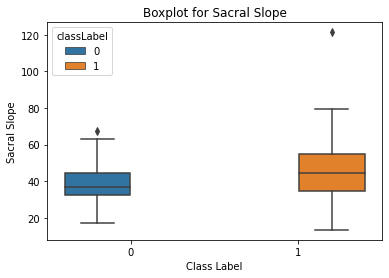

In [32]:
# Create boxplot for Sacral Slope
ax = sns.boxplot(x="classLabel", y="sacralSlope", hue="classLabel", data=data)
ax.set_title('Boxplot for Sacral Slope')
ax.set_ylabel('Sacral Slope')
ax.set_xlabel('Class Label')

Text(0.5, 0, 'Class Label')

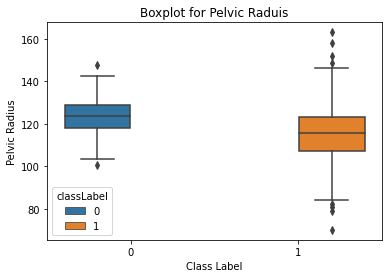

In [33]:
# Create boxplot for Pelvic Radius
ax = sns.boxplot(x="classLabel", y="pelvicRadius", hue="classLabel", data=data)
ax.set_title('Boxplot for Pelvic Raduis')
ax.set_ylabel('Pelvic Radius')
ax.set_xlabel('Class Label')

Text(0.5, 0, 'Class Label')

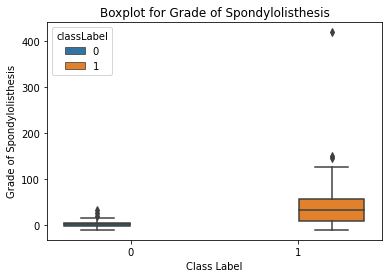

In [34]:
# Create boxplot for Grade of Spondylolisthesis
ax = sns.boxplot(x="classLabel", y="gradeOfSpondylolisthesis", hue="classLabel", data=data)
ax.set_title('Boxplot for Grade of Spondylolisthesis')
ax.set_ylabel('Grade of Spondylolisthesis')
ax.set_xlabel('Class Label')

    iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [35]:
# Separate training data (first 70 rows of class 0 and first 140 of class 1)
trainClass1 =  data.iloc[:140]
trainClass0 = data.iloc[210:280]
training = trainClass1.append(trainClass0, ignore_index=True)

# Get X training set
X_train = training.drop(columns="classLabel")

# Get y training set
y_train = training['classLabel'].astype('int')


# Separate rest of data for test set
testClass1 = data.iloc[140:210]
testClass0 = data.iloc[280:310]
test = testClass1.append(testClass0, ignore_index=True)
# Get X test set
X_test = test.drop(columns=['classLabel'])
# Get y test set
y_test = test['classLabel'].astype('int')

# Print to show the sets
print("Training Set:")
print(training.head())
print("\nFeatures Training Set:")
print(X_train.head())
print("\nLabels Training Set:")
print(y_train.head())
print("Test Set:")
print(test.head())
print("Features Training Set:")
print(X_test.head())
print("Labels Training Set:")
print(y_test.head())

Training Set:
   pelvicIncidence  pelvicTilt  lumbarLordosisAngle  sacralSlope  \
0            63.03       22.55                39.61        40.48   
1            39.06       10.06                25.02        29.00   
2            68.83       22.22                50.09        46.61   
3            69.30       24.65                44.31        44.64   
4            49.71        9.65                28.32        40.06   

   pelvicRadius  gradeOfSpondylolisthesis classLabel  
0         98.67                     -0.25          1  
1        114.41                      4.56          1  
2        105.99                     -3.53          1  
3        101.87                     11.21          1  
4        108.17                      7.92          1  

Features Training Set:
   pelvicIncidence  pelvicTilt  lumbarLordosisAngle  sacralSlope  \
0            63.03       22.55                39.61        40.48   
1            39.06       10.06                25.02        29.00   
2            68.83 

(c) Classification using KNN on Vertebral Column Data Set

    i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

    ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

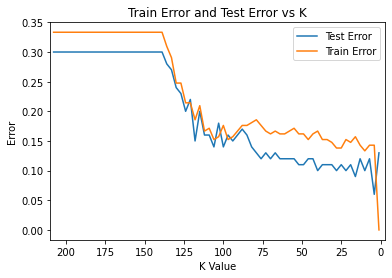

In [36]:
# Define lists to evaluate errors and track number of neighbors
trainErrors = []
testErrors = []
neighbors = []


# Run the KNN for multiple values of K
for k in range(208, 0, -3):
    
    # Define and train the model with k as a variable (from the loop)
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    
    # Predict the values from the test set
    y_pred = model.predict(X_test)
    
    # Save errors into list
    trainErrors.append(1-model.score(X_train, y_train))
    testErrors.append(1-model.score(X_test, y_test))
    neighbors.append(k)
    #print(k, 1-model.score(X_test, y_test))   

    
# Plot training error and test error vs K    
plt.plot(neighbors, testErrors)
plt.plot(neighbors, trainErrors)
plt.xlim(210,-3)
plt.legend(["Test Error", "Train Error"])
plt.title("Train Error and Test Error vs K")
plt.xlabel("K Value")
plt.ylabel("Error")
plt.show()

The most suitable k* among those values is 4 with an error of 0.06.

In [37]:
# Get the value for K in which the model has the best performance
# Fit, train, and run the model 
bestModel = KNeighborsClassifier(n_neighbors=4, weights='uniform')
bestModel.fit(X_train, y_train)
y_pred = bestModel.predict(X_test)


# Create a confusion matrix of the results
matrix = confusion_matrix(y_test, y_pred)
#Reference: https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py/50671617
trueNegative = matrix[0][0]
falseNegative = matrix[1][0]
truePositive = matrix[1][1]
falsePositive = matrix[0][1]


# Calculate the True Positive Rate
truePositiveRate = truePositive/(truePositive+falseNegative)
# Calculate the True Negative Rate
trueNegativeRate = trueNegative/(trueNegative+falsePositive) 
# Calculate the Precision
precision = truePositive/(truePositive+falsePositive)
# Calculate the F-1
f1 = (2*precision*truePositiveRate)/(precision+truePositiveRate)


# Print confusion matrix
print("Confusion Matrix: ")
print(matrix)
print("")


# Print other calculations
print("True Positive Rate: " + str(truePositiveRate))
print("True Negative Rate: " + str(trueNegativeRate))
print("Precision: " + str(precision))
print("F-1 Score: " + str(f1))

Confusion Matrix: 
[[25  5]
 [ 1 69]]

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F-1 Score: 0.9583333333333333


    iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5.
    For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

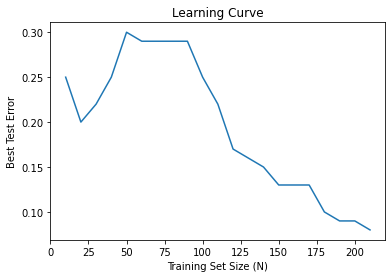

In [38]:
# Define lists to tack test errors and number of neighbors
bestTestErrors = []
N = []


# Go over different sizes of training set
for n in range(10, 211, 10):
    
    # Track size of training set
    N.append(n)
    
    # Define the X and y training sets based on the size of the training set
    Xn_train = X_train.iloc[:n-n//3].append(X_train.iloc[140:140+(n//3)])
    yn_train = y_train.iloc[:n-n//3].append(y_train.iloc[140:140+(n//3)])
    
    # Train and test the model for the different numbers of neighbors
    n_testErrors = []
    for k in range(1, n, 5):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Xn_train, yn_train)
        yn_pred = model.predict(X_test)
        # Save the test errors
        n_testErrors.append(1-model.score(X_test, y_test))
    
    # Get the best test errors for each number of neighbors
    bestTestErrors.append(min(n_testErrors))
    

# Plot the learning curve
plt.plot(N, bestTestErrors)
plt.title('Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error')
plt.show()  

(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.


    i. Minkowski Distance:
        A. which becomes Manhattan Distance with p = 1.

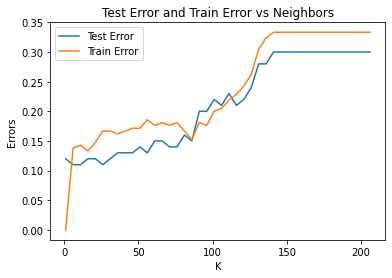

    Neighbors  Test Errors  Train Errors
0           1         0.12      0.000000
1           6         0.11      0.138095
2          11         0.11      0.142857
3          16         0.12      0.133333
4          21         0.12      0.147619
5          26         0.11      0.166667
6          31         0.12      0.166667
7          36         0.13      0.161905
8          41         0.13      0.166667
9          46         0.13      0.171429
10         51         0.14      0.171429
11         56         0.13      0.185714
12         61         0.15      0.176190
13         66         0.15      0.180952
14         71         0.14      0.176190
15         76         0.14      0.180952
16         81         0.16      0.166667
17         86         0.15      0.152381
18         91         0.20      0.180952
19         96         0.20      0.176190
20        101         0.22      0.200000
21        106         0.21      0.204762
22        111         0.23      0.219048
23        116   

In [39]:
# Define lists to evaluate errors and track number of neighbors
N = []
testErrors = []
trainErrors = []

# Run the KNN for multiple values of K
for i in range(1, 210, 5):
    
    # Define and train the model with k as a variable (from the loop)
    N.append(i) 
    model = KNeighborsClassifier(n_neighbors=i, weights="uniform", metric='minkowski', p=1)
    model.fit(X_train, y_train)
    
    # Predict the values from the test set
    model.predict(X_test)
    
    # Save errors into list
    testErrors.append(1-model.score(X_test, y_test))
    trainErrors.append(1-model.score(X_train, y_train))

    
# Plot training error and test error vs K
plt.plot(N, testErrors, label='Test Error')
plt.plot(N, trainErrors, label='Train Error')
plt.legend()
plt.title('Test Error and Train Error vs Neighbors')
plt.xlabel('K')
plt.ylabel('Errors')
plt.show()
summary = pd.DataFrame({"Neighbors": N, "Test Errors": testErrors, "Train Errors": trainErrors})
print(summary)

The most suitable k* among those values is 4 with an error of 0.099.

        B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1 (d)iA. What is the best log10(p)?
        

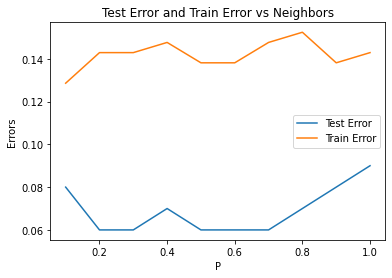

   Neighbors  Test Errors  Train Errors
0        0.1         0.08      0.128571
1        0.2         0.06      0.142857
2        0.3         0.06      0.142857
3        0.4         0.07      0.147619
4        0.5         0.06      0.138095
5        0.6         0.06      0.138095
6        0.7         0.06      0.147619
7        0.8         0.07      0.152381
8        0.9         0.08      0.138095
9        1.0         0.09      0.142857


In [40]:
# Define lists to evaluate errors and track number of neighbors
N = []
testErrors = []
trainErrors = []

# Run the KNN for multiple values of K
for i in np.arange(0.1, 1.1, 0.1):
    
    # Define and train the model with k as a variable (from the loop)
    N.append(i) 
    model = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric='minkowski', p=10**i)
    model.fit(X_train, y_train)
    model.predict(X_test)
    
    # Save errors into list
    testErrors.append(1-model.score(X_test, y_test))
    trainErrors.append(1-model.score(X_train, y_train))

    
# Plot training error and test error vs K
plt.plot(N, testErrors, label='Test Error')
plt.plot(N, trainErrors, label='Train Error')
plt.legend()
plt.title('Test Error and Train Error vs Neighbors')
plt.xlabel('P')
plt.ylabel('Errors')
plt.show()
summary = pd.DataFrame({"Neighbors": N, "Test Errors": testErrors, "Train Errors": trainErrors})
print(summary)

The most suitable log(p) is 0.2 with an error of 0.06.

        C. which becomes Chebyshev Distance with p → ∞

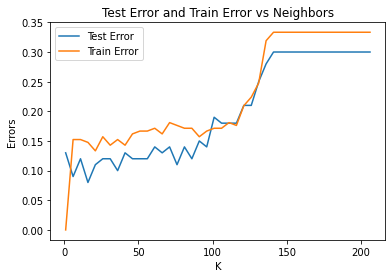

    Neighbors  Test Errors  Train Errors
0           1         0.13      0.000000
1           6         0.09      0.152381
2          11         0.12      0.152381
3          16         0.08      0.147619
4          21         0.11      0.133333
5          26         0.12      0.157143
6          31         0.12      0.142857
7          36         0.10      0.152381
8          41         0.13      0.142857
9          46         0.12      0.161905
10         51         0.12      0.166667
11         56         0.12      0.166667
12         61         0.14      0.171429
13         66         0.13      0.161905
14         71         0.14      0.180952
15         76         0.11      0.176190
16         81         0.14      0.171429
17         86         0.12      0.171429
18         91         0.15      0.157143
19         96         0.14      0.166667
20        101         0.19      0.171429
21        106         0.18      0.171429
22        111         0.18      0.180952
23        116   

In [41]:
# Define lists to evaluate errors and track number of neighbors
N = []
testErrors = []
trainErrors = []

# Run the KNN for multiple values of K
for i in range(1, 210, 5):
    
     # Define and train the model with k as a variable (from the loop)
    N.append(i) 
    model = KNeighborsClassifier(n_neighbors=i, weights="uniform", metric='chebyshev')
    model.fit(X_train, y_train)
    
    # Predict the values from the test set
    model.predict(X_test)
    
    # Save errors into list
    testErrors.append(1-model.score(X_test, y_test))
    trainErrors.append(1-model.score(X_train, y_train))

# Plot training error and test error vs K
plt.plot(N, testErrors, label='Test Error')
plt.plot(N, trainErrors, label='Train Error')
plt.legend()
plt.title('Test Error and Train Error vs Neighbors')
plt.xlabel('K')
plt.ylabel('Errors')
plt.show()
summary = pd.DataFrame({"Neighbors": N, "Test Errors": testErrors, "Train Errors": trainErrors})
print(summary)

The most suitable k* among those values is 2 with an error of 0.069.

    ii. Mahalanobis Distance.

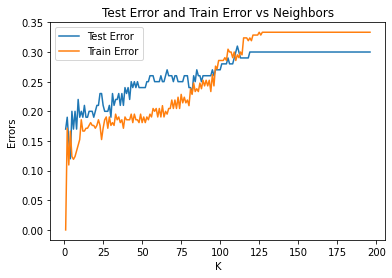

     Neighbors  Test Errors  Train Errors
0            1         0.17      0.000000
1            2         0.19      0.171429
2            3         0.15      0.109524
3            4         0.12      0.166667
4            5         0.20      0.123810
..         ...          ...           ...
191        192         0.30      0.333333
192        193         0.30      0.333333
193        194         0.30      0.333333
194        195         0.30      0.333333
195        196         0.30      0.333333

[196 rows x 3 columns]


In [42]:
N = []
testErrors = []
trainErrors = []

for i in range(1, 197):
    
    N.append(i) 
           
    model = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))}, algorithm="brute")
    model.fit(X_train, y_train)
    model.predict(X_test)
    
    testErrors.append(1-model.score(X_test, y_test))
    trainErrors.append(1-model.score(X_train, y_train))
  
plt.plot(N, testErrors, label='Test Error')
plt.plot(N, trainErrors, label='Train Error')
plt.legend()
plt.title('Test Error and Train Error vs Neighbors')
plt.xlabel('K')
plt.ylabel('Errors')
plt.show()
summary = pd.DataFrame({"Neighbors": N, "Test Errors": testErrors, "Train Errors": trainErrors})
print(summary)

The most suitable k* among those values is 4 with an error of 0.12.

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.


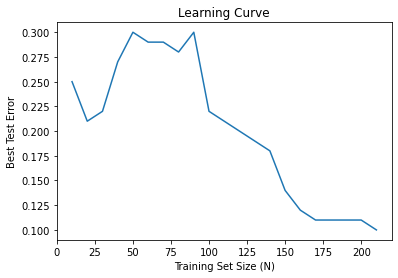

    Neighbors  Best Test Errors
0          10              0.25
1          20              0.21
2          30              0.22
3          40              0.27
4          50              0.30
5          60              0.29
6          70              0.29
7          80              0.28
8          90              0.30
9         100              0.22
10        110              0.21
11        120              0.20
12        130              0.19
13        140              0.18
14        150              0.14
15        160              0.12
16        170              0.11
17        180              0.11
18        190              0.11
19        200              0.11
20        210              0.10


In [43]:
# Define lists to tack test errors and number of neighbors
bestTestErrors = []
N = []


# Go over different sizes of training set
for n in range(10, 211, 10):
    
    # Track size of training set
    N.append(n)
    
    # Define the X and y training sets based on the size of the training set
    Xn_train = X_train.iloc[:n-n//3].append(X_train.iloc[140:140+(n//3)])
    yn_train = y_train.iloc[:n-n//3].append(y_train.iloc[140:140+(n//3)])
    
    # Train and test the model for the different numbers of neighbors
    n_testErrors = []
    for k in range(1, n, 5):
        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(Xn_train, yn_train)
        yn_pred = model.predict(X_test)
        # Save the test errors
        n_testErrors.append(1-model.score(X_test, y_test))
    
    # Get the best test errors for each number of neighbors
    bestTestErrors.append(min(n_testErrors))
    

# Plot the learning curve
plt.plot(N, bestTestErrors)
plt.title('Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error')
plt.show()  
summary = pd.DataFrame({"Neighbors": N, "Best Test Errors": bestTestErrors})
print(summary)

The best training set size error is 0.099 when the training set size is 196.

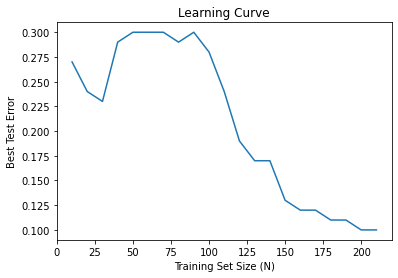

    Neighbors  Best Test Errors
0          10              0.27
1          20              0.24
2          30              0.23
3          40              0.29
4          50              0.30
5          60              0.30
6          70              0.30
7          80              0.29
8          90              0.30
9         100              0.28
10        110              0.24
11        120              0.19
12        130              0.17
13        140              0.17
14        150              0.13
15        160              0.12
16        170              0.12
17        180              0.11
18        190              0.11
19        200              0.10
20        210              0.10


In [44]:
# Define lists to tack test errors and number of neighbors
bestTestErrors = []
N = []


# Go over different sizes of training set
for n in range(10, 211, 10):
    
    # Track size of training set
    N.append(n)
    
    # Define the X and y training sets based on the size of the training set
    Xn_train = X_train.iloc[:n-n//3].append(X_train.iloc[140:140+(n//3)])
    yn_train = y_train.iloc[:n-n//3].append(y_train.iloc[140:140+(n//3)])
    
    # Train and test the model for the different numbers of neighbors
    n_testErrors = []
    for k in range(1, n, 5):
        model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=1)
        model.fit(Xn_train, yn_train)
        yn_pred = model.predict(X_test)
        # Save the test errors
        n_testErrors.append(1-model.score(X_test, y_test))
    
    # Get the best test errors for each number of neighbors
    bestTestErrors.append(min(n_testErrors))
    

# Plot the learning curve
plt.plot(N, bestTestErrors)
plt.title('Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error')
plt.show()  
summary = pd.DataFrame({"Neighbors": N, "Best Test Errors": bestTestErrors})
print(summary)

The best training set size error is 0.099 when the training set size is 196.

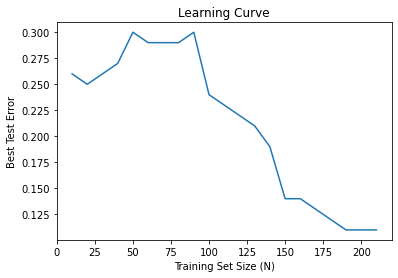

    Neighbors  Best Test Errors
0          10              0.26
1          20              0.25
2          30              0.26
3          40              0.27
4          50              0.30
5          60              0.29
6          70              0.29
7          80              0.29
8          90              0.30
9         100              0.24
10        110              0.23
11        120              0.22
12        130              0.21
13        140              0.19
14        150              0.14
15        160              0.14
16        170              0.13
17        180              0.12
18        190              0.11
19        200              0.11
20        210              0.11


In [45]:
# Define lists to tack test errors and number of neighbors
bestTestErrors = []
N = []


# Go over different sizes of training set
for n in range(10, 211, 10):
    
    # Track size of training set
    N.append(n)
    
    # Define the X and y training sets based on the size of the training set
    Xn_train = X_train.iloc[:n-n//3].append(X_train.iloc[140:140+(n//3)])
    yn_train = y_train.iloc[:n-n//3].append(y_train.iloc[140:140+(n//3)])
    
    # Train and test the model for the different numbers of neighbors
    n_testErrors = []
    for k in range(1, n, 5):
        model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric="chebyshev")
        model.fit(Xn_train, yn_train)
        yn_pred = model.predict(X_test)
        # Save the test errors
        n_testErrors.append(1-model.score(X_test, y_test))
    
    # Get the best test errors for each number of neighbors
    bestTestErrors.append(min(n_testErrors))
    

# Plot the learning curve
plt.plot(N, bestTestErrors)
plt.title('Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error')
plt.show() 
summary = pd.DataFrame({"Neighbors": N, "Best Test Errors": bestTestErrors})
print(summary)

The best training set size error is 0.109 when the training set size is 196.

(f) What is the lowest training error rate you achieved in this homework?

In this homework the lowest training error rate that I achieved was 0.06. This happened when K=4 and the the training set size was 210.